# No show appointment Data Analysis
### SUBMITTED BY : ONYEUKWU STEPHEN

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Using the Python tools NumPy, pandas, Matplotlib, and seaborn, I will analyze the Medical Appointment No Shows Dataset and provide my results. The dataset focuses on the issue of whether or not people show up for their appointment and gathers data from 110k medical visits in Brazil.

### Data Description
Dataset entails 110,527 medical appointments with 14 variables describing each observation.

The columns and meaning are listed below:
PatientId: Identification of a patient.

AppointmentID: Identification of each appointment.

Gender: Male (M) or Female (F).

ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.

AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.

Age: How old is the patient.

Neighbourhood: Where the appointment takes place.

Scholarship: True (1) of False (0).
Observation, this is a broad topic, consider reading this article here.

Hipertension: True (1) or False (0).

Diabetes: True (1) or False (0).

Alcoholism: True (1) or False (0).

Handcap: The handcap refers to the number of desabilites a person has. For example, if the person is blind and can't walk the total is 2, here.

SMS_received: 1 or more messages sent to the patient.

No-show: Yes or No.

### Research Question(s)
1. How did gender affect the rate at which patients showed up for their appointment.
2. The influence of the medical conditions(Alcoholism, Hypertension, Diabetes) on the how patients showed up for their appointment.
3. How the SMS reminder affected the patients show up.
4. What is the percentage of those on scholarship?

In [1]:
#Importing all packages necessary for use in the investigation of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Load the dataset and have a quick view of the dataset.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#To check the number of rows and columns in the provided dataset
df.shape

(110527, 14)

The dataset contains 110527 rows and 14 columns.

In [4]:
#To check the information of the data, this includes column name, null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information provided about the dataset it can be seen that there is no null column.

In [5]:
#To get a summary statistics of the numerical data, this includes the count, mean, standard deviation, etc.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#To know the number of males and females present in the study
df["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

### Data Cleaning (Assess and Correct Data points)
The following steps are carried out in this stage.
1. Correction of wrongly spelt column name simplt by renaming.
2. Chaning data type of column
3. Changing numerical variables into categorical

In [7]:
#Correct erroneous spelling in the name of columns
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'No-show':'no_show'}, inplace=True)

In [8]:
#Changing all column names to lowercase to ease the stress of case sensitivity of python.
df= df.rename(columns=str.lower)

In [9]:
#Replacing the no-show column to be more clear, where yes means absent and no means present
df['no_show'] = df['no_show'].replace({'No':'present','Yes':'absent'})

In [10]:
#Change data type of medical conditions (hypertension, diabetes,alcoholism) so as to make them categorical variables
df['hypertension'] = df['hypertension'].astype(str)
df['diabetes'] = df['diabetes'].astype(str)
df['alcoholism'] = df['alcoholism'].astype(str)

#Change the data type for the varaiable sms_received
df['sms_received'] = df['sms_received'].astype(str)

#Change the data type for the variable scholarship
df['scholarship'] = df['scholarship'].astype(str)




In [11]:
#Change the data under the following categorical variable to make them explanatory
df['hypertension'] = df['hypertension'].replace({'1':'hypertensive','0':'non-hypertensive'})
df['diabetes'] = df['diabetes'].replace({'1':'diabetic','0':'non-diabetic'})
df['alcoholism'] = df['alcoholism'].replace({'1':'alcoholic','0':'non-alcoholic'})
df['sms_received'] = df['sms_received'].replace({'1':'Received','0':'not-received'})
df['scholarship'] = df['scholarship'].replace({'1':'Yes','0':'No'})


## Exploratory Data Analysis

### What is the influence of gender on appointment show up?

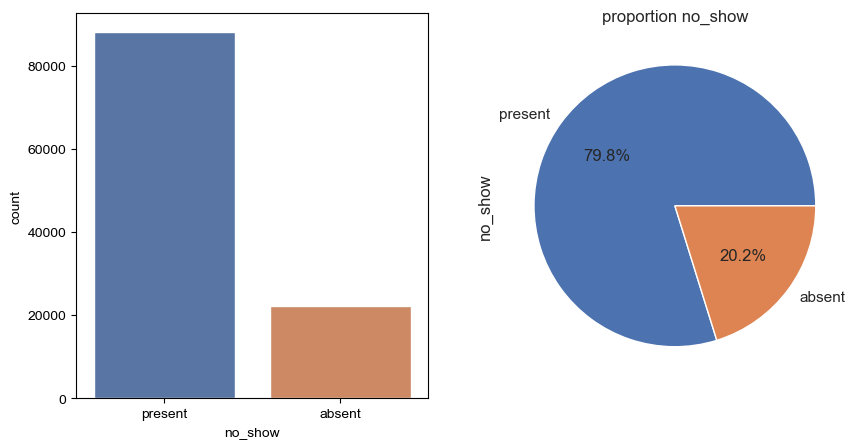

In [12]:
#A quick look at the no_show up variable before exploring in connection with other variables.
#The plot below shows both a countplot and a pie chart, showing the number of people and proportion of people in each category respectively.

#Countplot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.set_theme(style="whitegrid")
sns.countplot(x=df["no_show"])

#Piechart
plt.subplot(1,2,2)
df.no_show.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('proportion no_show')
plt.show()

The percentage of patients who were present is 79.8% and those absent 20.2%

[Text(0.5, 1.0, 'Gender vs Appointment')]

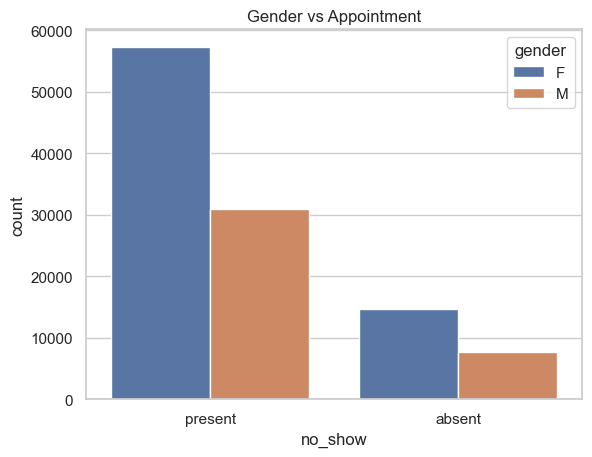

In [13]:
# A custom function to plot a countplot, this will take out the need for repetitive codes.
def countplotfunc(x,hue,title):
    sns.set_theme(style="whitegrid")
    return sns.countplot(data=df, x=x, hue=hue).set(title=title)
countplotfunc("no_show","gender","Gender vs Appointment")

Looking at the number of patients who showed up prior to examining the impact of gender on appointment show up, it was clear that more people were present (i.e. showed up) than were missing, A percentage of 79.8% showed up and 20.2% were absent.
When the gender variable was included in the research, it became clear that, on average, women significantly out-appeared men for appointments, also females were absent more than males.

### Exploring how each medical condition affect the appointment of patients
As I had anticipated, there are substantially less alcoholics there than I had anticipated. Additionally, there were more non-alcoholics missing than alcoholics, which raised the intriguing possibility that this may be due to the higher presence of non-alcoholics than alcoholics.
Similarly, non-hyppertensive patient showed up for their appointment more compared to the hypertensive patients, the non-hypertensive patient also had more no-show up rate than the hypertensive patient.
Individuals without diabetes are more likely than diabetic patients to show up for their appointment.
Surprisingly, it was shown from the acquired insight that patients who didn't receive a text message were more likely to show up for their appointment. Additionally, non-recipients of SMS messages were absent more frequently than recipients of SMS messages.

([Text(0.5, 1.0, 'Alcoholism vs Appointment')],)

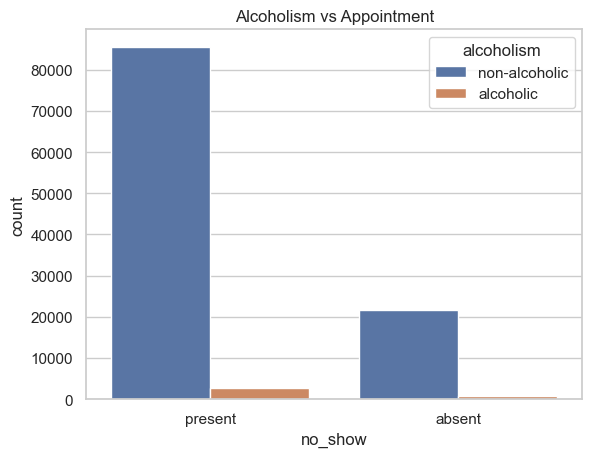

In [14]:
#Using the earlier function for create the plot, but exploring a different variable
countplotfunc('no_show','alcoholism','Alcoholism vs Appointment'), 

Before examining the alcoholic variable, I predicted that the non-alcoholic patients would attend their appointments more frequently than the alcoholics. Additionally, non-alcoholic missed more events than alcoholics did.

[Text(0.5, 1.0, 'hypertension vs Appointment')]

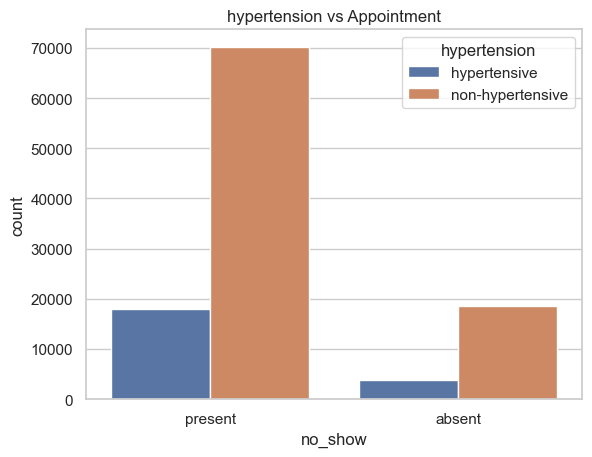

In [15]:
#Countplot for the hypertension variable.
countplotfunc('no_show','hypertension','hypertension vs Appointment')

In comparison to hypertension patients, non-hypertensive individuals were more likely to arrive for their appointments, and they also had a higher no-show rate.

[Text(0.5, 1.0, 'diabetes vs Appointment')]

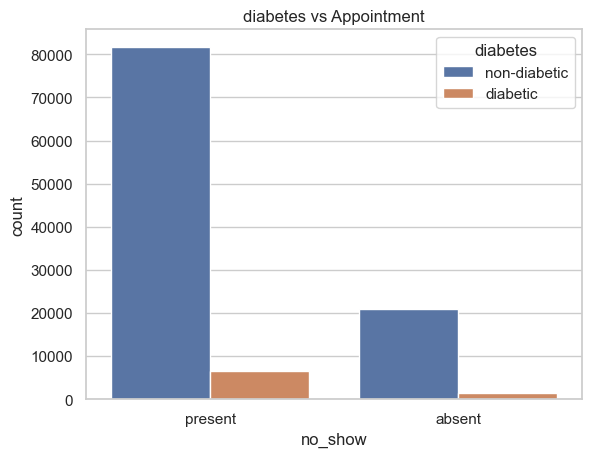

In [16]:
#Countplot for diabetes variable
countplotfunc('no_show','diabetes','diabetes vs Appointment')

Individuals with diabetes are less likely to keep appointments than non-diabetic patients.

[Text(0.5, 1.0, 'sms_received vs Appointment')]

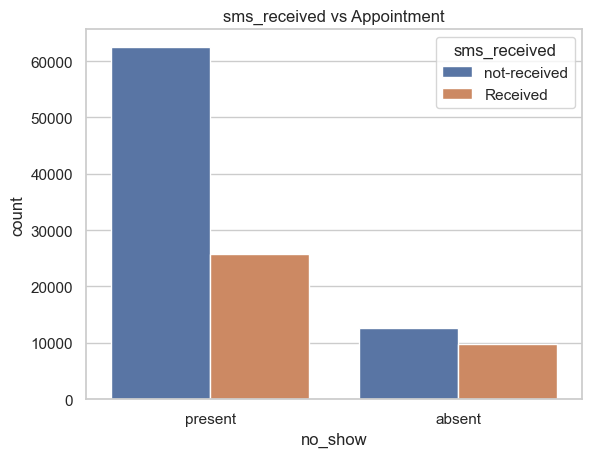

In [17]:
#countplot for Sms_received variable
countplotfunc('no_show','sms_received','sms_received vs Appointment')

the data revealed that patients were more likely to keep their appointment if they didn't receive a text message. Additionally, those who did not get SMS messages were missing more frequently than those who did.

## Percentage of patients on scholarship

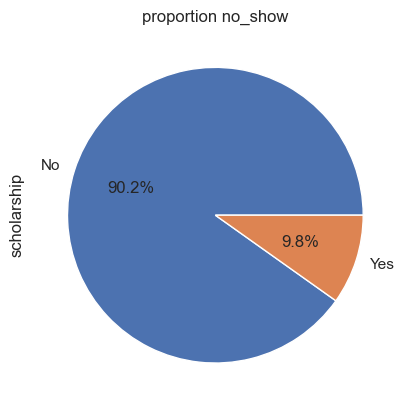

In [18]:
#To plot a pie chart to show the percentages of people that are on 
df.scholarship.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('proportion no_show')
plt.show()

From the above pie chart approximately 9.8% of the patients are beneficiaries of the scholarship

<a id='conclusions'></a>
## Conclusions
1. To check the influence of gender on the appointment show up, i noticed that overall, more people showed up than those who didnt show up (This is also visible in the proportion that shows 79.8% for those present and 20.2% for those absent. Also the females had a better show up rate than the males as well as the females had a low show up than the males. 
2. Also from the analysis it was noticed that the people who had not received SMS reminder showed up more than those who received text messages, this also applies for those who didnt show up, those who received SMS were also more absent compared to those who received SMS.
3. Checking the influence of the following medical conditions(Alcoholism, hypertension, diabetes), The non-alcoholics were more present for their appointment compared to the alcoholics. Same way the non-hypertensive patients showed up for their appointment more than the hypertensive patients. The non-diabetic patients also showed up for their appointment more than the diabetic patients.
4. About 9.8% of the patients are beneficiaries of the scholarship program.

## Limitations
1. What kind of impairment is taken into account is not indicated by the handcap data.
2. The no-show up variable was not well defined, which could lead to wrong analysis.

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate_a_dataset.ipynb'])

1